In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
dataset = pd.read_csv('result.csv')
dataset

,Name_Evr,Name_Fun,Time,Epoch,Best_Fit,Std,Optimum,Parameters
0,IWO,easom_function,0.042803,10,-3.422497e-243,1.000000e+00,-1.000000,NO
1,IWO,ackley_function,0.036030,10,1.110465e-03,1.110465e-03,0.000000,NO
2,IWO,ackley_function_3,0.033639,10,-1.864100e+02,9.218991e+00,-195.629028,NO
3,IWO,keane_function,0.032179,10,-6.736673e-01,2.122829e-07,-0.673668,NO
4,IWO,michaelwicz_function,0.030721,10,-1.801297e+00,3.152341e-06,-1.801300,NO
...,...,...,...,...,...,...,...,...
62793,ACO,cross_in_tray_function,1.767147,1000,-2.062612e+00,1.870823e-06,-2.062610,NO
62794,ACO,schaffer_function,1.750618,1000,0.000000e+00,0.000000e+00,0.000000,NO
62795,ACO,shubert_function_4,1.828032,1000,-2.553685e+01,2.040058e-01,-25.740858,NO
62796,ACO,drop_wave_function,1.733819,1000,-1.000000e+00,0.000000e+00,-1.000000,NO


In [38]:
print('Heuristics:', pd.unique(dataset['Name_Evr']), '\n')
print('Functions:', pd.unique(dataset['Name_Fun']))

Heuristics: ['IWO' 'HHO' 'ABC' 'BBO' 'CA' 'GA' 'ACO'] 

Functions: ['easom_function' 'ackley_function' 'ackley_function_3' 'keane_function'
 'michaelwicz_function' 'rosenbrook_function'
 'nonsmooth_multipeak_function' 'brown_function' 'levin_function_13'
 'bird_function' 'schwefel_function' 'brent_function'
 'deckkers_aarts_function' 'eggholder_function' 'shubert_function'
 'xin_she_yang_function_4' 'schaffer_function' 'shubert_function_4'
 'drop_wave_function' 'cross_in_tray_function']


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62798 entries, 0 to 62797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name_Evr    62798 non-null  object 
 1   Name_Fun    62798 non-null  object 
 2   Time        62798 non-null  float64
 3   Epoch       62798 non-null  int64  
 4   Best_Fit    62798 non-null  float64
 5   Std         62798 non-null  float64
 6   Optimum     62798 non-null  float64
 7   Parameters  62798 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 3.8+ MB


In [40]:
IWO = dataset[(dataset['Name_Evr'] == 'IWO')]
HHO = dataset[(dataset['Name_Evr'] == 'HHO')]
ABC = dataset[(dataset['Name_Evr'] == 'ABC')]
ACO = dataset[(dataset['Name_Evr'] == 'ACO')]
BBO = dataset[(dataset['Name_Evr'] == 'BBO')]
CA = dataset[(dataset['Name_Evr'] == 'CA')]
GA = dataset[(dataset['Name_Evr'] == 'GA')]

In [41]:
IWO_TE = IWO[['Time', 'Epoch']].groupby(['Epoch']).mean()
ACO_TE = ACO[['Time', 'Epoch']].groupby(['Epoch']).mean()
HHO_TE = HHO[['Time', 'Epoch']].groupby(['Epoch']).mean()
ABC_TE = ABC[['Time', 'Epoch']].groupby(['Epoch']).mean()
BBO_TE = BBO[['Time', 'Epoch']].groupby(['Epoch']).mean()
CA_TE = CA[['Time', 'Epoch']].groupby(['Epoch']).mean()
GA_TE = GA[['Time', 'Epoch']].groupby(['Epoch']).mean()

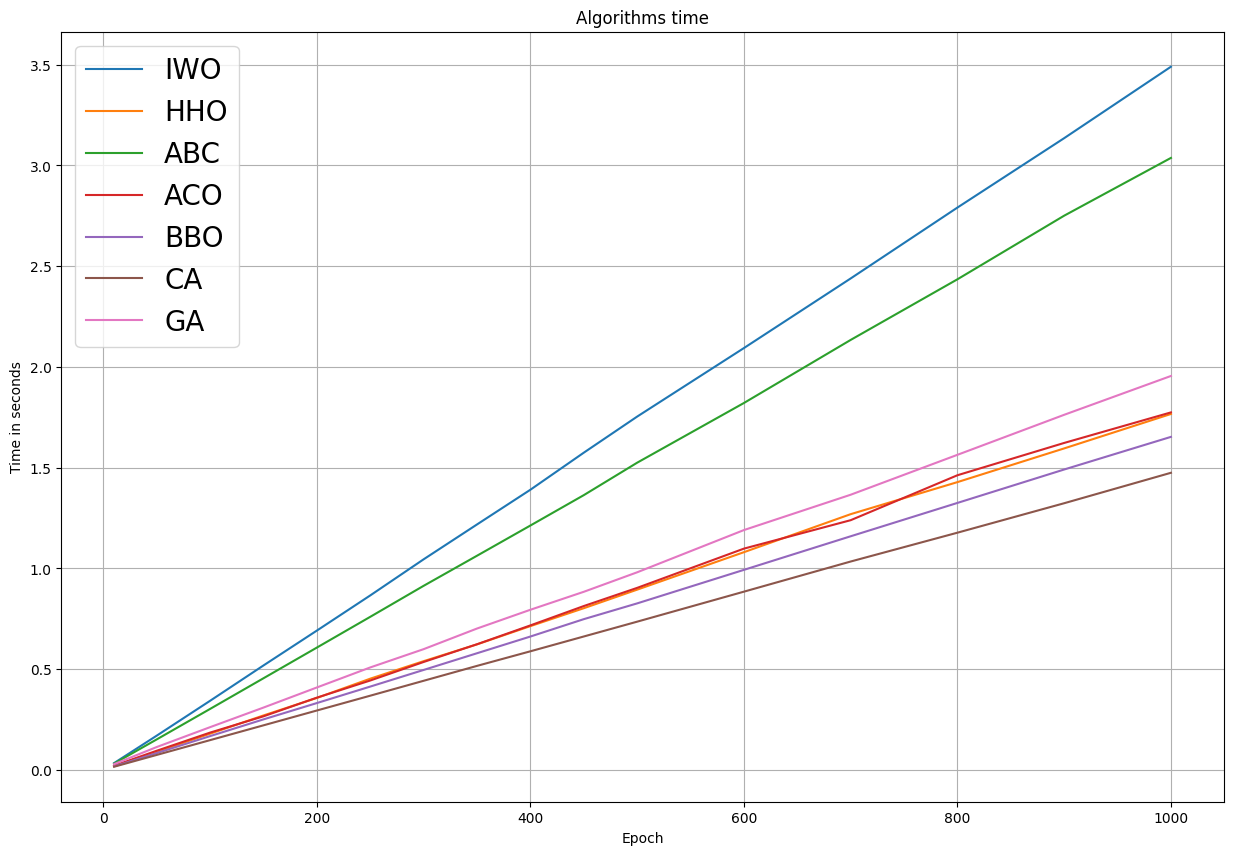

In [42]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(IWO_TE['Time'], label = 'IWO')
plt.plot(HHO_TE['Time'], label = 'HHO')
plt.plot(ABC_TE['Time'], label = 'ABC')
plt.plot(ACO_TE['Time'], label = 'ACO')
plt.plot(BBO_TE['Time'], label = 'BBO')
plt.plot(CA_TE['Time'], label = 'CA')
plt.plot(GA_TE['Time'], label = 'GA')

plt.ylabel('Time in seconds')
plt.xlabel('Epoch')
plt.title('Algorithms time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [43]:
IWO_ES = IWO[['Epoch', 'Std']].groupby(['Epoch']).mean()
HHO_ES = HHO[['Epoch', 'Std']].groupby(['Epoch']).mean()
ABC_ES = ABC[['Epoch', 'Std']].groupby(['Epoch']).mean()
ACO_ES = ACO[['Epoch', 'Std']].groupby(['Epoch']).mean()
BBO_ES = BBO[['Epoch', 'Std']].groupby(['Epoch']).mean()
CA_ES = CA[['Epoch', 'Std']].groupby(['Epoch']).mean()
GA_ES = GA[['Epoch', 'Std']].groupby(['Epoch']).mean()

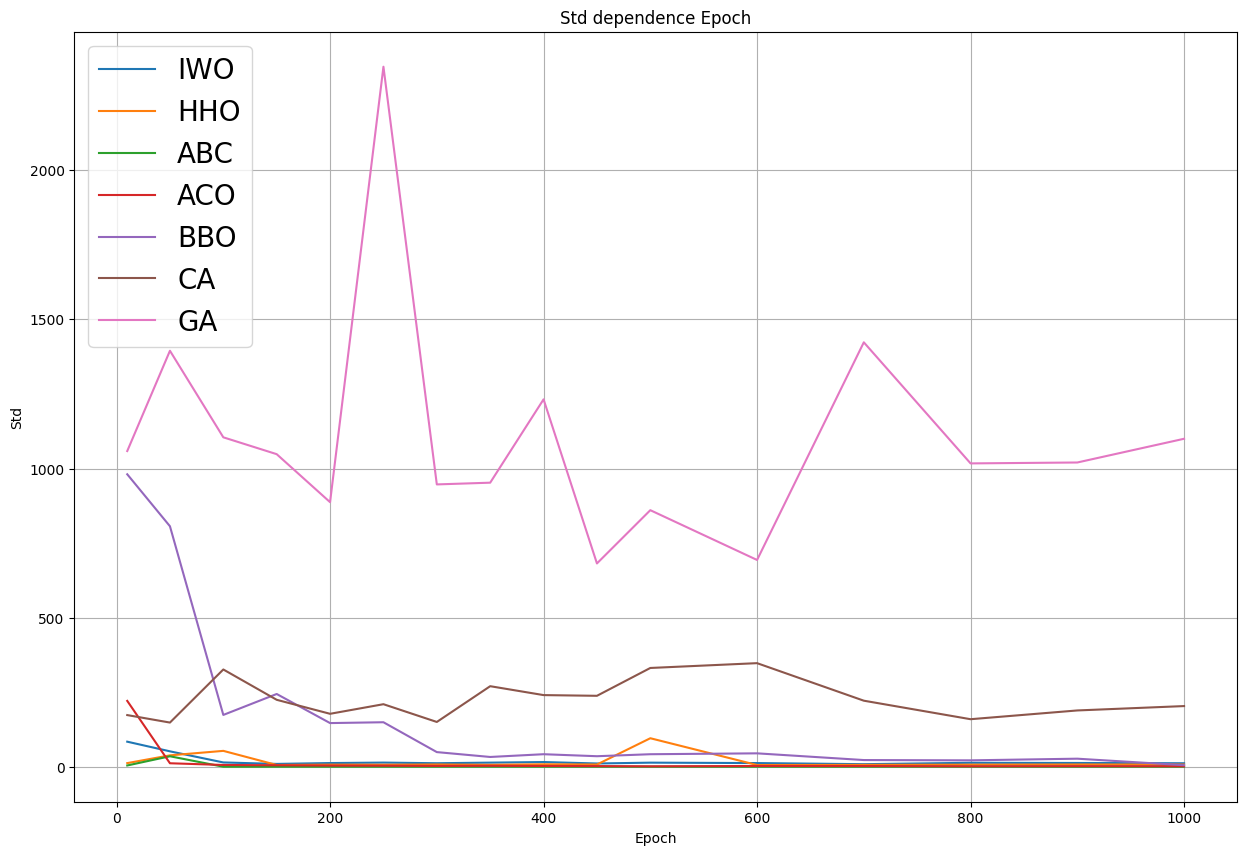

In [44]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(IWO_ES['Std'], label = 'IWO')
plt.plot(HHO_ES['Std'], label = 'HHO')
plt.plot(ABC_ES['Std'], label = 'ABC')
plt.plot(ACO_ES['Std'], label = 'ACO')
plt.plot(BBO_ES['Std'], label = 'BBO')
plt.plot(CA_ES['Std'], label = 'CA')
plt.plot(GA_ES['Std'], label = 'GA')

plt.ylabel('Std')
plt.xlabel('Epoch')
plt.title('Std dependence Epoch')
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [45]:
dataset[dataset['Epoch'] == 200][['Name_Evr', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr']).mean()

,Time,Best_Fit,Std,Optimum
Name_Evr,,,,
ABC,0.607721,-1011.290802,0.564684,-1011.436252
ACO,0.359131,-1308.906386,4.315920,-1312.706868
BBO,0.332369,-995.597374,146.826102,-1142.423476
CA,0.295379,-964.680615,177.918089,-1142.423476
GA,0.409717,-371.410491,887.182142,-1258.592629
HHO,0.357842,-1209.065440,7.441824,-1216.002719
IWO,0.692088,-1203.655869,12.851369,-1216.002719


# Evr

In [46]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'ACO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit           Std  \
Name_Evr Name_Fun                                                             
ACO      ackley_function               0.361969  3.842717e-12  3.842717e-12   
         ackley_function_3             0.361339 -1.864107e+02  9.218349e+00   
         bird_function                 0.357393 -1.067241e+02  8.283710e-02   
         brent_function                0.355442  1.664977e-25  1.664977e-25   
         brown_function                0.350368  8.141141e-04  8.141141e-04   
         cross_in_tray_function        0.354874 -2.062605e+00  7.797237e-06   
         deckkers_aarts_function       0.354059 -2.477623e+04  5.133169e+00   
         drop_wave_function            0.348895 -9.963925e-01  3.607461e-03   
         easom_function                0.359070 -1.000000e+00  1.934960e-16   
         eggholder_function            0.363122 -9.521617e+02  7.478962e+00   
         keane_function                0.367698 -6.733369e-01  3.306468e-04   
         levin_function_13             0.362558  2.480366e-23  2.480366e-23   
         michaelwicz_function          0.361453 -1.801303e+00  3.410099e-06   
         nonsmooth_multipeak_function  0.352322  0.000000e+00  0.000000e+00   
         rosenbrook_function           0.350405  4.624711e-06  4.624711e-06   
         schaffer_function             0.347985  0.000000e+00  0.000000e+00   
         schwefel_function             0.350036  5.925300e+01  5.925300e+01   
         shubert_function              0.378730 -1.826514e+02  4.079496e+00   
         shubert_function_4            0.367000 -2.467305e+01  1.067813e+00   
         xin_she_yang_function_4       0.377899 -2.000000e+00  3.353104e-09   

                                            Optimum  
Name_Evr Name_Fun                                    
ACO      ackley_function                   0.000000  
         ackley_function_3              -195.629028  
         bird_function                  -106.764537  
         brent_function                    0.000000  
         brown_function                    0.000000  
         cross_in_tray_function           -2.062610  
         deckkers_aarts_function      -24771.093750  
         drop_wave_function               -1.000000  
         easom_function                   -1.000000  
         eggholder_function             -959.640700  
         keane_function                   -0.673668  
         levin_function_13                 0.000000  
         michaelwicz_function             -1.801300  
         nonsmooth_multipeak_function      0.000000  
         rosenbrook_function               0.000000  
         schaffer_function                 0.000000  
         schwefel_function                 0.000000  
         shubert_function               -186.730900  
         shubert_function_4              -25.740858  
         xin_she_yang_function_4          -2.000000

In [47]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'IWO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit           Std  \
Name_Evr Name_Fun                                                             
IWO      ackley_function               0.668543  2.879018e-04  2.879018e-04   
         ackley_function_3             0.683253 -1.864112e+02  9.217823e+00   
         bird_function                 0.687619 -1.067877e+02  2.319531e-02   
         brent_function                0.628496  2.215904e-08  2.215904e-08   
         brown_function                0.636041  1.713739e-03  1.713739e-03   
         cross_in_tray_function        0.719954 -2.062612e+00  1.868132e-06   
         deckkers_aarts_function       0.633786 -2.477652e+04  5.424325e+00   
         drop_wave_function            0.674060 -9.985203e-01  1.479679e-03   
         easom_function                0.640038 -8.000000e-01  2.000000e-01   
         eggholder_function            0.715088 -8.015487e+02  1.580920e+02   
         keane_function                0.669422 -6.736675e-01  2.253950e-08   
         levin_function_13             0.730346  1.972039e-07  1.972039e-07   
         michaelwicz_function          0.649207 -1.801303e+00  2.742789e-06   
         nonsmooth_multipeak_function  0.617413  0.000000e+00  0.000000e+00   
         rosenbrook_function           0.611102  2.559584e-07  2.559584e-07   
         schaffer_function             0.639398  2.125581e-11  2.125581e-11   
         schwefel_function             0.643778  1.042267e+02  1.042267e+02   
         shubert_function              0.868864 -1.867309e+02  4.758086e-05   
         shubert_function_4            0.855330 -2.574177e+01  9.097164e-04   
         xin_she_yang_function_4       0.821865 -1.599877e+00  4.001230e-01   

                                            Optimum  
Name_Evr Name_Fun                                    
IWO      ackley_function                   0.000000  
         ackley_function_3              -195.629028  
         bird_function                  -106.764537  
         brent_function                    0.000000  
         brown_function                    0.000000  
         cross_in_tray_function           -2.062610  
         deckkers_aarts_function      -24771.093750  
         drop_wave_function               -1.000000  
         easom_function                   -1.000000  
         eggholder_function             -959.640700  
         keane_function                   -0.673668  
         levin_function_13                 0.000000  
         michaelwicz_function             -1.801300  
         nonsmooth_multipeak_function      0.000000  
         rosenbrook_function               0.000000  
         schaffer_function                 0.000000  
         schwefel_function                 0.000000  
         shubert_function               -186.730900  
         shubert_function_4              -25.740858  
         xin_she_yang_function_4          -2.000000

In [48]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'HHO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit           Std  \
Name_Evr Name_Fun                                                             
HHO      ackley_function               0.360921  0.000000e+00  0.000000e+00   
         ackley_function_3             0.362253 -1.864112e+02  9.217816e+00   
         bird_function                 0.357991 -1.067877e+02  2.319669e-02   
         brent_function                0.339351  3.573356e-23  3.573356e-23   
         brown_function                0.325994  7.315649e-60  7.315649e-60   
         cross_in_tray_function        0.360314 -2.062612e+00  1.870823e-06   
         deckkers_aarts_function       0.337999 -2.477652e+04  5.424592e+00   
         drop_wave_function            0.337479 -1.000000e+00  0.000000e+00   
         easom_function                0.347550 -1.000000e+00  3.552714e-17   
         eggholder_function            0.367505 -8.744097e+02  8.523104e+01   
         keane_function                0.352436 -6.736675e-01  1.620926e-15   
         levin_function_13             0.370813  2.123134e-15  2.123134e-15   
         michaelwicz_function          0.353236 -1.754324e+00  4.698238e-02   
         nonsmooth_multipeak_function  0.337560  0.000000e+00  0.000000e+00   
         rosenbrook_function           0.330160  1.303431e-21  1.303431e-21   
         schaffer_function             0.331328  0.000000e+00  0.000000e+00   
         schwefel_function             0.352323  6.079848e+01  6.079848e+01   
         shubert_function              0.419981 -1.867309e+02  8.831023e-06   
         shubert_function_4            0.406951 -2.574177e+01  9.119997e-04   
         xin_she_yang_function_4       0.402810 -2.000000e+00  0.000000e+00   

                                            Optimum  
Name_Evr Name_Fun                                    
HHO      ackley_function                   0.000000  
         ackley_function_3              -195.629028  
         bird_function                  -106.764537  
         brent_function                    0.000000  
         brown_function                    0.000000  
         cross_in_tray_function           -2.062610  
         deckkers_aarts_function      -24771.093750  
         drop_wave_function               -1.000000  
         easom_function                   -1.000000  
         eggholder_function             -959.640700  
         keane_function                   -0.673668  
         levin_function_13                 0.000000  
         michaelwicz_function             -1.801300  
         nonsmooth_multipeak_function      0.000000  
         rosenbrook_function               0.000000  
         schaffer_function                 0.000000  
         schwefel_function                 0.000000  
         shubert_function               -186.730900  
         shubert_function_4              -25.740858  
         xin_she_yang_function_4          -2.000000

In [49]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'ABC')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit           Std  \
Name_Evr Name_Fun                                                             
ABC      ackley_function               0.608290  0.000000e+00  0.000000e+00   
         ackley_function_3             0.608720 -1.864112e+02  9.217816e+00   
         bird_function                 0.601917 -1.067877e+02  2.319669e-02   
         brent_function                0.582165  1.383897e-87  1.383897e-87   
         brown_function                0.576751  6.867497e-35  6.867497e-35   
         cross_in_tray_function        0.613663 -2.062612e+00  1.870823e-06   
         deckkers_aarts_function       0.581483 -2.477652e+04  5.424592e+00   
         drop_wave_function            0.591144 -9.999988e-01  1.150366e-06   
         easom_function                0.594345 -9.999999e-01  6.451210e-08   
         eggholder_function            0.613236 -9.596407e+02  3.728019e-05   
         keane_function                0.597086 -6.736675e-01  1.221245e-16   
         levin_function_13             0.617438  1.349784e-31  1.349784e-31   
         michaelwicz_function          0.597933 -1.801303e+00  3.410099e-06   
         nonsmooth_multipeak_function  0.585740  0.000000e+00  0.000000e+00   
         rosenbrook_function           0.577389  4.236389e-31  4.236389e-31   
         schaffer_function             0.585419  0.000000e+00  0.000000e+00   
         schwefel_function             0.595889  2.545513e-05  2.545513e-05   
         shubert_function              0.667575 -1.867171e+02  1.383712e-02   
         shubert_function_4            0.663753 -2.574174e+01  9.063674e-04   
         xin_she_yang_function_4       0.659845 -2.000000e+00  0.000000e+00   

                                            Optimum  
Name_Evr Name_Fun                                    
ABC      ackley_function                   0.000000  
         ackley_function_3              -195.629028  
         bird_function                  -106.764537  
         brent_function                    0.000000  
         brown_function                    0.000000  
         cross_in_tray_function           -2.062610  
         deckkers_aarts_function      -24771.093750  
         drop_wave_function               -1.000000  
         easom_function                   -1.000000  
         eggholder_function             -959.640700  
         keane_function                   -0.673668  
         levin_function_13                 0.000000  
         michaelwicz_function             -1.801300  
         nonsmooth_multipeak_function      0.000000  
         rosenbrook_function               0.000000  
         schaffer_function                 0.000000  
         schwefel_function                 0.000000  
         shubert_function               -186.730900  
         shubert_function_4              -25.740858  
         xin_she_yang_function_4          -2.000000

In [50]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'BBO')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit          Std  \
Name_Evr Name_Fun                                                            
BBO      ackley_function               0.331459      2.138829     2.138829   
         ackley_function_3             0.335230   -175.333141    20.295887   
         bird_function                 0.326908   -106.225499     0.539038   
         brent_function                0.322052      0.012161     0.012161   
         brown_function                0.317437      0.003723     0.003723   
         cross_in_tray_function        0.335182     -2.061921     0.000689   
         deckkers_aarts_function       0.319372 -21532.402968  3238.690782   
         drop_wave_function            0.322358     -0.891524     0.108476   
         easom_function                0.327873     -0.099364     0.900636   
         eggholder_function            0.337282   -859.548517   100.092183   
         keane_function                0.329725     -0.645781     0.027887   
         levin_function_13             0.341679      0.283753     0.283753   
         michaelwicz_function          0.327883     -1.792640     0.008660   
         nonsmooth_multipeak_function  0.319139      0.048051     0.048051   
         rosenbrook_function           0.317356      0.107018     0.107018   
         schaffer_function             0.319480      0.003080     0.003080   
         schwefel_function             0.327286      7.750284     7.750284   
         shubert_function              0.363908   -181.867512     4.863388   
         shubert_function_4            0.358332    -25.296234     0.444624   
         xin_she_yang_function_4       0.363040     -1.736446     0.263554   

                                            Optimum  
Name_Evr Name_Fun                                    
BBO      ackley_function                   0.000000  
         ackley_function_3              -195.629028  
         bird_function                  -106.764537  
         brent_function                    0.000000  
         brown_function                    0.000000  
         cross_in_tray_function           -2.062610  
         deckkers_aarts_function      -24771.093750  
         drop_wave_function               -1.000000  
         easom_function                   -1.000000  
         eggholder_function             -959.640700  
         keane_function                   -0.673668  
         levin_function_13                 0.000000  
         michaelwicz_function             -1.801300  
         nonsmooth_multipeak_function      0.000000  
         rosenbrook_function               0.000000  
         schaffer_function                 0.000000  
         schwefel_function                 0.000000  
         shubert_function               -186.730900  
         shubert_function_4              -25.740858  
         xin_she_yang_function_4          -2.000000

In [51]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'CA')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time      Best_Fit          Std  \
Name_Evr Name_Fun                                                            
CA       ackley_function               0.302110      1.148898     1.148898   
         ackley_function_3             0.296163   -173.256146    22.372883   
         bird_function                 0.299520   -103.344842     3.424334   
         brent_function                0.282222      0.073876     0.073876   
         brown_function                0.279751      0.005968     0.005968   
         cross_in_tray_function        0.297504     -2.058211     0.004399   
         deckkers_aarts_function       0.281975 -21017.906615  3757.212484   
         drop_wave_function            0.284826     -0.916945     0.083055   
         easom_function                0.288399     -0.425051     0.574949   
         eggholder_function            0.298659   -769.741855   189.898845   
         keane_function                0.289622     -0.661822     0.011846   
         levin_function_13             0.304107      0.311136     0.311136   
         michaelwicz_function          0.295016     -1.714928     0.086373   
         nonsmooth_multipeak_function  0.283737      0.321839     0.321839   
         rosenbrook_function           0.278751      0.257140     0.257140   
         schaffer_function             0.282697      0.003382     0.003382   
         schwefel_function             0.290447     77.873798    77.873798   
         shubert_function              0.324498   -155.044348    31.686554   
         shubert_function_4            0.321493    -22.209000     3.531994   
         xin_she_yang_function_4       0.322325     -1.484829     0.515171   

                                            Optimum  
Name_Evr Name_Fun                                    
CA       ackley_function                   0.000000  
         ackley_function_3              -195.629028  
         bird_function                  -106.764537  
         brent_function                    0.000000  
         brown_function                    0.000000  
         cross_in_tray_function           -2.062610  
         deckkers_aarts_function      -24771.093750  
         drop_wave_function               -1.000000  
         easom_function                   -1.000000  
         eggholder_function             -959.640700  
         keane_function                   -0.673668  
         levin_function_13                 0.000000  
         michaelwicz_function             -1.801300  
         nonsmooth_multipeak_function      0.000000  
         rosenbrook_function               0.000000  
         schaffer_function                 0.000000  
         schwefel_function                 0.000000  
         shubert_function               -186.730900  
         shubert_function_4              -25.740858  
         xin_she_yang_function_4          -2.000000

In [52]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Evr'] == 'GA')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()

Time     Best_Fit           Std  \
Name_Evr Name_Fun                                                            
GA       ackley_function               0.402991     3.182551      3.182551   
         ackley_function_3             0.407635  -147.844043     47.784986   
         bird_function                 0.412182  -100.275106      6.489431   
         brent_function                0.394363     0.414363      0.414363   
         brown_function                0.398605     0.020213      0.020213   
         cross_in_tray_function        0.399515    -2.054452      0.008158   
         deckkers_aarts_function       0.396812 -6538.747878  18232.345872   
         drop_wave_function            0.391186    -0.734997      0.265003   
         easom_function                0.389786    -0.085716      0.914284   
         eggholder_function            0.472868  -809.926134    149.714566   
         keane_function                0.412862    -0.542902      0.130765   
         levin_function_13             0.416090     0.636285      0.636285   
         michaelwicz_function          0.404075    -1.512815      0.288485   
         nonsmooth_multipeak_function  0.392847     0.081938      0.081938   
         rosenbrook_function           0.395425     1.510040      1.510040   
         schaffer_function             0.398189     0.007115      0.007115   
         schwefel_function             0.403153    16.874674     16.874674   
         shubert_function              0.450397  -138.734811     47.996089   
         shubert_function_4            0.424787   -24.624168      1.116746   
         xin_she_yang_function_4       0.436013    -1.148127      0.851873   

                                            Optimum  
Name_Evr Name_Fun                                    
GA       ackley_function                   0.000000  
         ackley_function_3              -195.629028  
         bird_function                  -106.764537  
         brent_function                    0.000000  
         brown_function                    0.000000  
         cross_in_tray_function           -2.062610  
         deckkers_aarts_function      -24771.093750  
         drop_wave_function               -1.000000  
         easom_function                   -1.000000  
         eggholder_function             -959.640700  
         keane_function                   -0.673668  
         levin_function_13                 0.000000  
         michaelwicz_function             -1.801300  
         nonsmooth_multipeak_function      0.000000  
         rosenbrook_function               0.000000  
         schaffer_function                 0.000000  
         schwefel_function                 0.000000  
         shubert_function               -186.730900  
         shubert_function_4              -25.740858  
         xin_she_yang_function_4          -2.000000

# Fuctions

In [53]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'ackley_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun        Name_Evr                                               
ackley_function ABC       0.608290  0.000000e+00  0.000000e+00      0.0
                ACO       0.361969  3.842717e-12  3.842717e-12      0.0
                BBO       0.331459  2.138829e+00  2.138829e+00      0.0
                CA        0.302110  1.148898e+00  1.148898e+00      0.0
                GA        0.402991  3.182551e+00  3.182551e+00      0.0
                HHO       0.360921  0.000000e+00  0.000000e+00      0.0
                IWO       0.668543  2.879018e-04  2.879018e-04      0.0

In [54]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'ackley_function_3')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit        Std     Optimum
Name_Fun          Name_Evr                                             
ackley_function_3 ABC       0.608720 -186.411213   9.217816 -195.629028
                  ACO       0.361339 -186.410679   9.218349 -195.629028
                  BBO       0.335230 -175.333141  20.295887 -195.629028
                  CA        0.296163 -173.256146  22.372883 -195.629028
                  GA        0.407635 -147.844043  47.784986 -195.629028
                  HHO       0.362253 -186.411213   9.217816 -195.629028
                  IWO       0.683253 -186.411206   9.217823 -195.629028

In [55]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'bird_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit       Std     Optimum
Name_Fun      Name_Evr                                            
bird_function ABC       0.601917 -106.787734  0.023197 -106.764537
              ACO       0.357393 -106.724106  0.082837 -106.764537
              BBO       0.326908 -106.225499  0.539038 -106.764537
              CA        0.299520 -103.344842  3.424334 -106.764537
              GA        0.412182 -100.275106  6.489431 -106.764537
              HHO       0.357991 -106.787734  0.023197 -106.764537
              IWO       0.687619 -106.787732  0.023195 -106.764537

In [56]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'brent_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun       Name_Evr                                               
brent_function ABC       0.582165  1.383897e-87  1.383897e-87      0.0
               ACO       0.355442  1.664977e-25  1.664977e-25      0.0
               BBO       0.322052  1.216052e-02  1.216052e-02      0.0
               CA        0.282222  7.387626e-02  7.387626e-02      0.0
               GA        0.394363  4.143629e-01  4.143629e-01      0.0
               HHO       0.339351  3.573356e-23  3.573356e-23      0.0
               IWO       0.628496  2.215904e-08  2.215904e-08      0.0

In [57]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'brown_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun       Name_Evr                                               
brown_function ABC       0.576751  6.867497e-35  6.867497e-35      0.0
               ACO       0.350368  8.141141e-04  8.141141e-04      0.0
               BBO       0.317437  3.722541e-03  3.722541e-03      0.0
               CA        0.279751  5.968398e-03  5.968398e-03      0.0
               GA        0.398605  2.021312e-02  2.021312e-02      0.0
               HHO       0.325994  7.315649e-60  7.315649e-60      0.0
               IWO       0.636041  1.713739e-03  1.713739e-03      0.0

In [58]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'deckkers_aarts_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  \
Name_Fun                Name_Evr                                         
deckkers_aarts_function ABC       0.581483 -24776.518342      5.424592   
                        ACO       0.354059 -24776.226919      5.133169   
                        BBO       0.319372 -21532.402968   3238.690782   
                        CA        0.281975 -21017.906615   3757.212484   
                        GA        0.396812  -6538.747878  18232.345872   
                        HHO       0.337999 -24776.518342      5.424592   
                        IWO       0.633786 -24776.518075      5.424325   

                                      Optimum  
Name_Fun                Name_Evr               
deckkers_aarts_function ABC      -24771.09375  
                        ACO      -24771.09375  
                        BBO      -24771.09375  
                        CA       -24771.09375  
                        GA       -24771.09375  
                        HHO      -24771.09375  
                        IWO      -24771.09375

In [59]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'easom_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit           Std  Optimum
Name_Fun       Name_Evr                                           
easom_function ABC       0.594345 -1.000000  6.451210e-08     -1.0
               ACO       0.359070 -1.000000  1.934960e-16     -1.0
               BBO       0.327873 -0.099364  9.006365e-01     -1.0
               CA        0.288399 -0.425051  5.749493e-01     -1.0
               GA        0.389786 -0.085716  9.142838e-01     -1.0
               HHO       0.347550 -1.000000  3.552714e-17     -1.0
               IWO       0.640038 -0.800000  2.000000e-01     -1.0

In [60]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'eggholder_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit         Std   Optimum
Name_Fun           Name_Evr                                            
eggholder_function ABC       0.613236 -959.640663    0.000037 -959.6407
                   ACO       0.363122 -952.161738    7.478962 -959.6407
                   BBO       0.337282 -859.548517  100.092183 -959.6407
                   CA        0.298659 -769.741855  189.898845 -959.6407
                   GA        0.472868 -809.926134  149.714566 -959.6407
                   HHO       0.367505 -874.409664   85.231036 -959.6407
                   IWO       0.715088 -801.548709  158.091991 -959.6407

In [61]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'keane_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit           Std   Optimum
Name_Fun       Name_Evr                                            
keane_function ABC       0.597086 -0.673668  1.221245e-16 -0.673668
               ACO       0.367698 -0.673337  3.306468e-04 -0.673668
               BBO       0.329725 -0.645781  2.788694e-02 -0.673668
               CA        0.289622 -0.661822  1.184590e-02 -0.673668
               GA        0.412862 -0.542902  1.307654e-01 -0.673668
               HHO       0.352436 -0.673668  1.620926e-15 -0.673668
               IWO       0.669422 -0.673667  2.253950e-08 -0.673668

In [62]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'levin_function_13')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun          Name_Evr                                               
levin_function_13 ABC       0.617438  1.349784e-31  1.349784e-31      0.0
                  ACO       0.362558  2.480366e-23  2.480366e-23      0.0
                  BBO       0.341679  2.837535e-01  2.837535e-01      0.0
                  CA        0.304107  3.111356e-01  3.111356e-01      0.0
                  GA        0.416090  6.362848e-01  6.362848e-01      0.0
                  HHO       0.370813  2.123134e-15  2.123134e-15      0.0
                  IWO       0.730346  1.972039e-07  1.972039e-07      0.0

In [63]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'michaelwicz_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit       Std  Optimum
Name_Fun             Name_Evr                                       
michaelwicz_function ABC       0.597933 -1.801303  0.000003  -1.8013
                     ACO       0.361453 -1.801303  0.000003  -1.8013
                     BBO       0.327883 -1.792640  0.008660  -1.8013
                     CA        0.295016 -1.714928  0.086373  -1.8013
                     GA        0.404075 -1.512815  0.288485  -1.8013
                     HHO       0.353236 -1.754324  0.046982  -1.8013
                     IWO       0.649207 -1.801303  0.000003  -1.8013

In [64]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'nonsmooth_multipeak_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit       Std  Optimum
Name_Fun                     Name_Evr                                       
nonsmooth_multipeak_function ABC       0.585740  0.000000  0.000000      0.0
                             ACO       0.352322  0.000000  0.000000      0.0
                             BBO       0.319139  0.048051  0.048051      0.0
                             CA        0.283737  0.321839  0.321839      0.0
                             GA        0.392847  0.081938  0.081938      0.0
                             HHO       0.337560  0.000000  0.000000      0.0
                             IWO       0.617413  0.000000  0.000000      0.0

In [65]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'rosenbrook_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time      Best_Fit           Std  Optimum
Name_Fun            Name_Evr                                               
rosenbrook_function ABC       0.577389  4.236389e-31  4.236389e-31      0.0
                    ACO       0.350405  4.624711e-06  4.624711e-06      0.0
                    BBO       0.317356  1.070183e-01  1.070183e-01      0.0
                    CA        0.278751  2.571397e-01  2.571397e-01      0.0
                    GA        0.395425  1.510040e+00  1.510040e+00      0.0
                    HHO       0.330160  1.303431e-21  1.303431e-21      0.0
                    IWO       0.611102  2.559584e-07  2.559584e-07      0.0

In [66]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'schwefel_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit         Std  Optimum
Name_Fun          Name_Evr                                           
schwefel_function ABC       0.595889    0.000025    0.000025      0.0
                  ACO       0.350036   59.252996   59.252996      0.0
                  BBO       0.327286    7.750284    7.750284      0.0
                  CA        0.290447   77.873798   77.873798      0.0
                  GA        0.403153   16.874674   16.874674      0.0
                  HHO       0.352323   60.798479   60.798479      0.0
                  IWO       0.643778  104.226718  104.226718      0.0

In [67]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'shubert_function')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time    Best_Fit        Std   Optimum
Name_Fun         Name_Evr                                           
shubert_function ABC       0.667575 -186.717066   0.013837 -186.7309
                 ACO       0.378730 -182.651404   4.079496 -186.7309
                 BBO       0.363908 -181.867512   4.863388 -186.7309
                 CA        0.324498 -155.044348  31.686554 -186.7309
                 GA        0.450397 -138.734811  47.996089 -186.7309
                 HHO       0.419981 -186.730909   0.000009 -186.7309
                 IWO       0.868864 -186.730853   0.000048 -186.7309

In [68]:
dataset[(dataset['Epoch'] == 200) & (dataset['Name_Fun'] == 'xin_she_yang_function_4')][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Fun', 'Name_Evr']).mean()

Time  Best_Fit           Std  Optimum
Name_Fun                Name_Evr                                           
xin_she_yang_function_4 ABC       0.659845 -2.000000  0.000000e+00     -2.0
                        ACO       0.377899 -2.000000  3.353104e-09     -2.0
                        BBO       0.363040 -1.736446  2.635538e-01     -2.0
                        CA        0.322325 -1.484829  5.151711e-01     -2.0
                        GA        0.436013 -1.148127  8.518733e-01     -2.0
                        HHO       0.402810 -2.000000  0.000000e+00     -2.0
                        IWO       0.821865 -1.599877  4.001230e-01     -2.0

In [69]:
RES_TABLE = dataset[dataset['Epoch'] == 200][['Name_Evr', 'Name_Fun', 'Time', 'Best_Fit', 'Std', 'Optimum']]\
.groupby(['Name_Evr', 'Name_Fun']).mean()
RES_TABLE

Time      Best_Fit           Std  \
Name_Evr Name_Fun                                                        
ABC      ackley_function          0.608290  0.000000e+00  0.000000e+00   
         ackley_function_3        0.608720 -1.864112e+02  9.217816e+00   
         bird_function            0.601917 -1.067877e+02  2.319669e-02   
         brent_function           0.582165  1.383897e-87  1.383897e-87   
         brown_function           0.576751  6.867497e-35  6.867497e-35   
...                                    ...           ...           ...   
IWO      schaffer_function        0.639398  2.125581e-11  2.125581e-11   
         schwefel_function        0.643778  1.042267e+02  1.042267e+02   
         shubert_function         0.868864 -1.867309e+02  4.758086e-05   
         shubert_function_4       0.855330 -2.574177e+01  9.097164e-04   
         xin_she_yang_function_4  0.821865 -1.599877e+00  4.001230e-01   

                                     Optimum  
Name_Evr Name_Fun                             
ABC      ackley_function            0.000000  
         ackley_function_3       -195.629028  
         bird_function           -106.764537  
         brent_function             0.000000  
         brown_function             0.000000  
...                                      ...  
IWO      schaffer_function          0.000000  
         schwefel_function          0.000000  
         shubert_function        -186.730900  
         shubert_function_4       -25.740858  
         xin_she_yang_function_4   -2.000000  

[140 rows x 4 columns]

In [70]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
 
# All dataframes hereafter reflect these changes.
display(RES_TABLE)
 
print('**RESET_OPTIONS**')
 
# Resets the options
pd.reset_option('all')

/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_29732/2598050708.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Time      Best_Fit           Std  \
Name_Evr Name_Fun                                                             
ABC      ackley_function               0.608290  0.000000e+00  0.000000e+00   
         ackley_function_3             0.608720 -1.864112e+02  9.217816e+00   
         bird_function                 0.601917 -1.067877e+02  2.319669e-02   
         brent_function                0.582165  1.383897e-87  1.383897e-87   
         brown_function                0.576751  6.867497e-35  6.867497e-35   
         cross_in_tray_function        0.613663 -2.062612e+00  1.870823e-06   
         deckkers_aarts_function       0.581483 -2.477652e+04  5.424592e+00   
         drop_wave_function            0.591144 -9.999988e-01  1.150366e-06   
         easom_function                0.594345 -9.999999e-01  6.451210e-08   
         eggholder_function            0.613236 -9.596407e+02  3.728019e-05   
         keane_function                0.597086 -6.736675e-01  1.221245e-16   
         levin_function_13             0.617438  1.349784e-31  1.349784e-31   
         michaelwicz_function          0.597933 -1.801303e+00  3.410099e-06   
         nonsmooth_multipeak_function  0.585740  0.000000e+00  0.000000e+00   
         rosenbrook_function           0.577389  4.236389e-31  4.236389e-31   
         schaffer_function             0.585419  0.000000e+00  0.000000e+00   
         schwefel_function             0.595889  2.545513e-05  2.545513e-05   
         shubert_function              0.667575 -1.867171e+02  1.383712e-02   
         shubert_function_4            0.663753 -2.574174e+01  9.063674e-04   
         xin_she_yang_function_4       0.659845 -2.000000e+00  0.000000e+00   
ACO      ackley_function               0.361969  3.842717e-12  3.842717e-12   
         ackley_function_3             0.361339 -1.864107e+02  9.218349e+00   
         bird_function                 0.357393 -1.067241e+02  8.283710e-02   
         brent_function                0.355442  1.664977e-25  1.664977e-25   
         brown_function                0.350368  8.141141e-04  8.141141e-04   
         cross_in_tray_function        0.354874 -2.062605e+00  7.797237e-06   
         deckkers_aarts_function       0.354059 -2.477623e+04  5.133169e+00   
         drop_wave_function            0.348895 -9.963925e-01  3.607461e-03   
         easom_function                0.359070 -1.000000e+00  1.934960e-16   
         eggholder_function            0.363122 -9.521617e+02  7.478962e+00   
         keane_function                0.367698 -6.733369e-01  3.306468e-04   
         levin_function_13             0.362558  2.480366e-23  2.480366e-23   
         michaelwicz_function          0.361453 -1.801303e+00  3.410099e-06   
         nonsmooth_multipeak_function  0.352322  0.000000e+00  0.000000e+00   
         rosenbrook_function           0.350405  4.624711e-06  4.624711e-06   
         schaffer_function             0.347985  0.000000e+00  0.000000e+00   
         schwefel_function             0.350036  5.925300e+01  5.925300e+01   
         shubert_function              0.378730 -1.826514e+02  4.079496e+00   
         shubert_function_4            0.367000 -2.467305e+01  1.067813e+00   
         xin_she_yang_function_4       0.377899 -2.000000e+00  3.353104e-09   
BBO      ackley_function               0.331459  2.138829e+00  2.138829e+00   
         ackley_function_3             0.335230 -1.753331e+02  2.029589e+01   
         bird_function                 0.326908 -1.062255e+02  5.390384e-01   
         brent_function                0.322052  1.216052e-02  1.216052e-02   
         brown_function                0.317437  3.722541e-03  3.722541e-03   
         cross_in_tray_function        0.335182 -2.061921e+00  6.889477e-04   
         deckkers_aarts_function       0.319372 -2.153240e+04  3.238691e+03   
         drop_wave_function            0.322358 -8.915236e-01  1.084764e-01   
         easom_function                0.327873 -9.936354e-02  9.006365e-01   
         eggho

**RESET_OPTIONS**


/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_29732/2598050708.py:12: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_29732/2598050708.py:12: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
/var/folders/1j/287nr9g51b128plm6r3b3dsh0000gn/T/ipykernel_29732/2598050708.py:12: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')
